# Students' Performance Exams
In this moduule, we will perform an exploratory data analysis (EDA) on the Students' Performance Exams dataset hosted on Kaggle. A modified version of the dataset is embedded in Thinkful's SQL database, where we will access it using postgres.

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

### Libraries and Packages


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [7]:
from sqlalchemy import create_engine

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [10]:
sql_query = '''
SELECT * FROM studentsperformance
'''

In [18]:
student_df = pd.read_sql_query(sql_query, con=engine)

In [19]:
engine.dispose()

### Initial look at the Data

In [12]:
student_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
540,male,group C,high school,standard,completed,75,69,68
7,male,group B,some college,free/reduced,none,40,43,39
705,male,group A,bachelor's degree,free/reduced,none,62,72,65
916,male,group E,bachelor's degree,standard,completed,100,100,100
265,male,group D,some high school,free/reduced,none,59,42,41


In [13]:
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


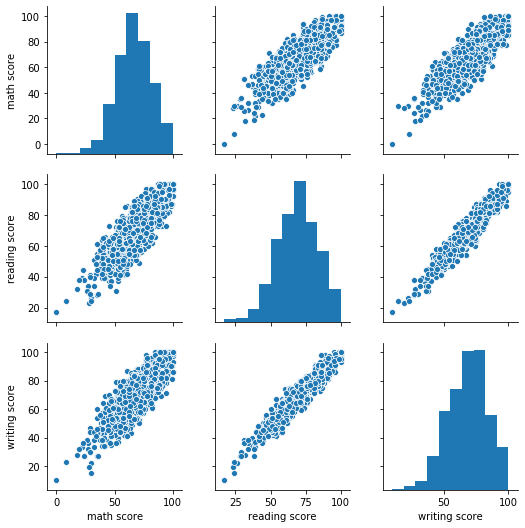

In [17]:
sns.pairplot(student_df)
plt.show()

## 1. Differences between genders, ethnicities, and parental level of education with respect to exam performance

In [20]:
student_df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [38]:
from scipy.stats.stats import ttest_ind

test_scores = ['math score', 'reading score', 'writing score']

ttest_ind(student_df[student_df['gender']=='female'][test_cols],
          student_df[student_df['gender']=='male'][test_cols])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

In [32]:
student_df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [64]:
ethnicities = student_df['race/ethnicity'].unique()
ethnicities_df = student_df.groupby('race/ethnicity')

sig_level = 0.05 # can be changed at your own discretion

for score in test_scores:
    print('\n----------------------------')
    print(f'Comparison for {score}:')
    print('----------------------------\n')
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(f't-test between {ethnicities[i]} and {ethnicities[j]}:')
            ttest = ttest_ind(student_df[student_df['race/ethnicity']==ethnicities[i]][score],
                            student_df[student_df['race/ethnicity']==ethnicities[j]][score])
            if ttest.pvalue<sig_level*0.01:
                sig_marker = '***'
            elif ttest.pvalue<sig_level*0.1:
                sig_marker = '**'
            elif ttest.pvalue<sig_level:
                sig_marker = '*'
            else:
                sig_marker = ''
            print(f'\tT-statistic = {ttest.statistic:2.3f}, p-value = {ttest.pvalue:2.3f} {sig_marker}')


----------------------------
Comparison for math score:
----------------------------

t-test between group B and group C:
	T-statistic = -0.732, p-value = 0.465 
t-test between group B and group A:
	T-statistic = 0.936, p-value = 0.350 
t-test between group B and group D:
	T-statistic = -2.828, p-value = 0.005 **
t-test between group B and group E:
	T-statistic = -6.007, p-value = 0.000 ***
t-test between group C and group A:
	T-statistic = 1.600, p-value = 0.110 
t-test between group C and group D:
	T-statistic = -2.419, p-value = 0.016 *
t-test between group C and group E:
	T-statistic = -6.128, p-value = 0.000 ***
t-test between group A and group D:
	T-statistic = -3.347, p-value = 0.001 **
t-test between group A and group E:
	T-statistic = -5.936, p-value = 0.000 ***
t-test between group D and group E:
	T-statistic = -4.282, p-value = 0.000 ***

----------------------------
Comparison for reading score:
----------------------------

t-test between group B and group C:
	T-statistic

By taking a look at which p-values are significant, we can see that for score and ethnicities, all of them are significant except between groups A, B, and C. It would be interesting to know what each group's ethnicity is, although this is understandbly sensitive.

In [63]:
student_df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [67]:
educations = student_df['parental level of education'].unique()
ethnicities_df = student_df.groupby('parental level of education')

sig_level = 0.05 # can be changed at your own discretion

for score in test_scores:
    print('\n----------------------------')
    print(f'Comparison for {score}:')
    print('----------------------------\n')
    for i in range(0, len(educations)):
        for j in range(i+1, len(educations)):
            print(f't-test between {educations[i]} and {educations[j]}:')
            ttest = ttest_ind(student_df[student_df['parental level of education']==educations[i]][score],
                            student_df[student_df['parental level of education']==educations[j]][score])
            if ttest.pvalue<sig_level*0.01:
                sig_marker = '***'
            elif ttest.pvalue<sig_level*0.1:
                sig_marker = '**'
            elif ttest.pvalue<sig_level:
                sig_marker = '*'
            else:
                sig_marker = ''
            print(f'\tT-statistic = {ttest.statistic:2.3f}, p-value = {ttest.pvalue:2.3f} {sig_marker}')


----------------------------
Comparison for math score:
----------------------------

t-test between bachelor's degree and some college:
	T-statistic = 1.370, p-value = 0.172 
t-test between bachelor's degree and master's degree:
	T-statistic = -0.149, p-value = 0.882 
t-test between bachelor's degree and associate's degree:
	T-statistic = 0.879, p-value = 0.380 
t-test between bachelor's degree and high school:
	T-statistic = 4.236, p-value = 0.000 ***
t-test between bachelor's degree and some high school:
	T-statistic = 3.197, p-value = 0.002 **
t-test between some college and master's degree:
	T-statistic = -1.236, p-value = 0.218 
t-test between some college and associate's degree:
	T-statistic = -0.543, p-value = 0.588 
t-test between some college and high school:
	T-statistic = 3.546, p-value = 0.000 ***
t-test between some college and some high school:
	T-statistic = 2.412, p-value = 0.016 *
t-test between master's degree and associate's degree:
	T-statistic = 0.841, p-value = 

We can see that there are significant differences between having a higher degree and not. Even an associates is significant when compared to only high school.

## 2. Differences between the lunch types with respect to exam performance

In [68]:
student_df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [70]:
ttest_ind(student_df[student_df['lunch']=='free/reduced'][test_scores],
          student_df[student_df['lunch']=='standard'][test_scores])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

While there is a significant difference between the students who have free/reduced lunch and standard lunch, this is a correlation probably due to another third variable that better explains the discrepancy - class difference. Richer kids may have more access to other features that allow for better scores (e.g. tutoring, parents who had a higher education, overall wealth benefits).

## 3. The effect of test preparation courses

In [71]:
student_df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [74]:
ttest_ind(student_df[student_df['test preparation course']=='completed'][test_scores],
          student_df[student_df['test preparation course']=='none'][test_scores])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

There are significant differences. For example, math scores apprently were not helped by test preparation courses, however, it may be that students who took prep courses for math were already performly poorly and did better. Test preparation courses seem to have helped with reading and writing.

## 4. Exams that are most correlated with each other

In [75]:
student_df[test_scores].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


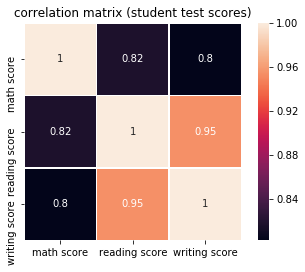

In [84]:
sns.heatmap(student_df[test_scores].corr(), annot=True, square=True, linewidths=.5)
plt.title('correlation matrix (student test scores)')
plt.show()

Reading and Writing are most correlated. However, math scores with the other two are also quite highly correlated.